# 서울시 CCTV 현황 분석

## 0. 한글 폰트 설치 후 진행

### 1) 한글 폰트 설치
* 설치 후 **'런타임 다시 시작'**

In [1]:
!apt-get update
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:13 https://

### 2) 한글 폰트 사용


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

## 1. 파일 업로드

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1) 파일 업로드 확인
* seoulCCTV.csv
* seoulPopulation.xls

In [3]:
!ls -l

total 28
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data
-rw-r--r-- 1 root root  1135 Aug 13 05:35 seoulCCTV.csv
-rw-r--r-- 1 root root 19968 Aug 13 05:35 seoulPopulation.xls


## 2. 'seoulCCTV.csv'파일 전처리

### 1) 'seoulCCTV.csv'파일 읽어오기

In [5]:
import pandas as pd

SDF = pd.read_csv('seoulCCTV.csv', encoding = 'utf-8')

SDF.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 2) '기관명' column을 '자치구'로 변경
* 열(column)이름 확인

In [6]:
SDF.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [7]:
SDF.rename(columns={'기관명':'자치구'}, inplace = True)
SDF.head()

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


### 3) CCTV 데이터 현황 파악
* '소계' 오름차순 정렬

In [8]:
SDF.sort_values(by='소계', ascending=True).head(7)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348
5,광진구,707,573,78,53,174
2,강북구,748,369,120,138,204


* '소계' 내림차순 정렬

In [9]:
SDF.sort_values(by='소계', ascending=False).head(7)

,자치구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613


### 4) 최근증가율 열(col) 추가
* 최근 3년 CCTV '최근증가율' 열 추가

In [10]:
SDF['최근증가율'] = ((SDF['2014년']+SDF['2015년']+SDF['2016년'])/SDF['2013년도 이전'])*100

SDF.sort_values(by='최근증가율', ascending=False).head(7)

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765
19,영등포구,904,495,214,195,373,157.979798
0,강남구,2780,1292,430,584,932,150.619195


## 3. 'seoulPoplulation.xls' 파일 전처리

### 1) 'seoulPopulation.xls'파일 읽어오기

In [12]:
SDFP = pd.read_excel('seoulPopulation.xls', header=2, usecols= 'B,D,G,J,N')
                    # encoding = 'UTF-8')

SDFP.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 2) column 이름 변경
    

In [13]:
SDFP.rename(columns={'계':'인구수', '계.1':'한국인', '계.2':'외국인', '65세이상고령자':'고령자'}, inplace=True)

SDFP.head()

,자치구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


### 3) 인구 데이터 현황 파악
* 합계행 삭제

In [14]:
SDFP.drop(index=0, inplace = True)
SDFP.head()

,자치구,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


* '자치구'열의 unique 정보 확인

In [15]:
SDFP['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

* NaN 정보 확인

In [16]:
SDFP[SDFP['자치구'].isnull()]

,자치구,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [17]:
SDFP.tail()

,자치구,인구수,한국인,외국인,고령자
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0
26,NaN,NaN,NaN,NaN,NaN


* NaN 행 삭제

In [18]:
SDFP.drop([26], inplace = True)
SDFP.tail()

,자치구,인구수,한국인,외국인,고령자
21,관악구,525515.0,507203.0,18312.0,68082.0
22,서초구,450310.0,445994.0,4316.0,51733.0
23,강남구,570500.0,565550.0,4950.0,63167.0
24,송파구,667483.0,660584.0,6899.0,72506.0
25,강동구,453233.0,449019.0,4214.0,54622.0


* '외국인비율'과 '고령자비율' 열 계산 후 추가

In [19]:
SDFP['외국인비율'] = (SDFP['외국인']/SDFP['인구수'])*100
SDFP['고령자비율'] = (SDFP['고령자']/SDFP['외국인'])*100

SDFP.head()

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,275.430614
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,232.571685
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,245.683868
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,508.608850
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,282.311242


* 인구수 내림차순 정렬

In [20]:
SDFP.sort_values(by='인구수', ascending=False).head(7)

,자치구,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,1050.963908
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,1112.017167
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,1276.101010
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,1883.765384
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,371.788991
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,1627.311586
15,양천구,479978.0,475949.0,4029.0,52975.0,0.839413,1314.842393


## 4. CCTV 데이터와 인구 데이터 합치기

### 1) 두 데이터프레임에 공통으로 있는 '자치구'열로 merge

In [21]:
DFM = pd.merge(SDF, SDFP, on = '자치구')
DFM.head()

,자치구,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,1276.101010
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,1296.203132
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,1563.405590
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,1112.017167
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,371.788991


* 불필요한 열 삭제

In [24]:
DFM.drop(columns = ['2013년도 이전', '2014년', '2015년', '2016년'], inplace=True)

DFM.head()

,자치구,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,1276.101010
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,1296.203132
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,1563.405590
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,1112.017167
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,371.788991


### 3) '자치구'를 index로 지정

In [25]:
DFM.set_index('자치구', inplace = True)
DFM.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,1276.101010
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,1296.203132
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,1563.405590
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,1112.017167
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,371.788991


### 4) 상관계수
* 고령자비율과 소계의 상관계수 구하기

In [26]:
import numpy as np

print(np.corrcoef(DFM['고령자비율'], DFM['소계']))

[[1.         0.05922237]
 [0.05922237 1.        ]]


* 외국인비율과 소계의 상관계수

In [28]:
print(np.corrcoef(DFM['외국인비율'], DFM['소계']))

[[ 1.         -0.13607433]
 [-0.13607433  1.        ]]


* 인구수 vs 소계

In [29]:
print(np.corrcoef(DFM['인구수'], DFM['소계']))

[[1.         0.30634228]
 [0.30634228 1.        ]]


## 5. 시각화

### 1) 막대 그래프 

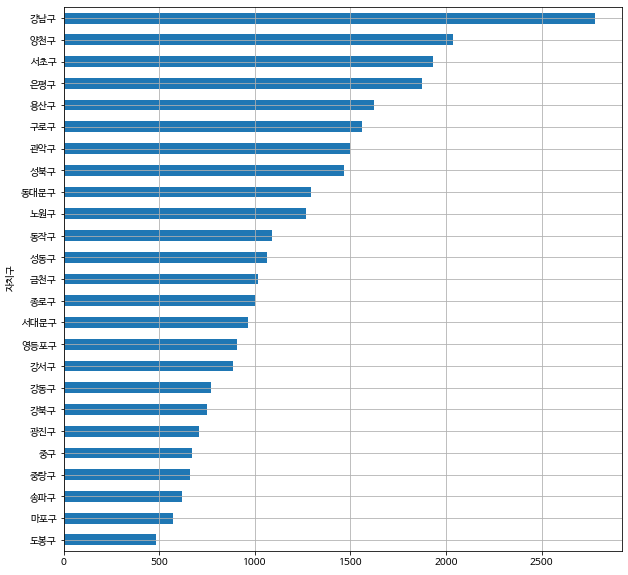

In [31]:
import matplotlib.pyplot as plt

DFM['소계'].sort_values().plot(kind = 'barh', grid = True, figsize = (10,10))
plt.show()

* 인구수 대비 CCTV비율 계산 후 정렬하여 시각화

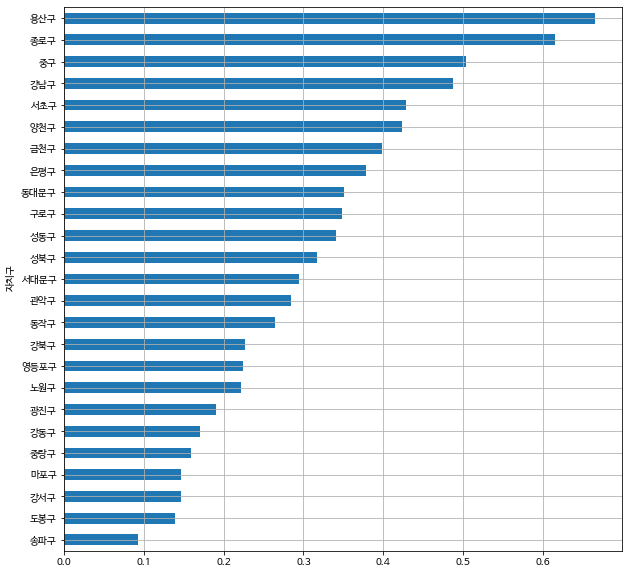

In [32]:
DFM['CCTV비율'] = DFM['소계'] / DFM['인구수'] * 100

DFM['CCTV비율'].sort_values().plot(kind = 'barh', grid = True, figsize=(10,10))
plt.show()

### 2) 산점도(scatter)
* 소계 & 인구수

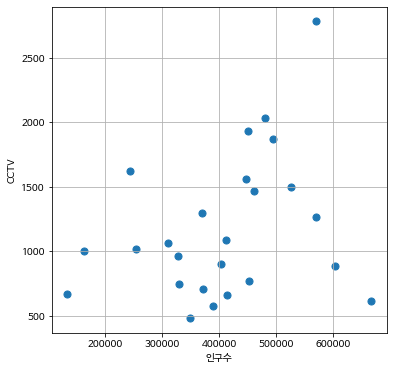

In [33]:
plt.figure(figsize = (6,6))
plt.scatter(DFM['인구수'], DFM['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 3) 회귀계수 계산


In [34]:
np.set_printoptions(suppress=True)

fp1 = np.polyfit(DFM['인구수'], DFM['소계'], 1)

fp1

array([  0.00130916, 645.06649658])

* x축, y축 데이터 계산

In [35]:
f1 = np.poly1d(fp1)
print(f1, '\n')

fx = np.linspace(100000, 700000, 100)
print(fx)

 
0.001309 x + 645.1 

[100000.         106060.60606061 112121.21212121 118181.81818182
 124242.42424242 130303.03030303 136363.63636364 142424.24242424
 148484.84848485 154545.45454545 160606.06060606 166666.66666667
 172727.27272727 178787.87878788 184848.48484848 190909.09090909
 196969.6969697  203030.3030303  209090.90909091 215151.51515152
 221212.12121212 227272.72727273 233333.33333333 239393.93939394
 245454.54545455 251515.15151515 257575.75757576 263636.36363636
 269696.96969697 275757.57575758 281818.18181818 287878.78787879
 293939.39393939 300000.         306060.60606061 312121.21212121
 318181.81818182 324242.42424242 330303.03030303 336363.63636364
 342424.24242424 348484.84848485 354545.45454545 360606.06060606
 366666.66666667 372727.27272727 378787.87878788 384848.48484848
 390909.09090909 396969.6969697  403030.3030303  409090.90909091
 415151.51515152 421212.12121212 427272.72727273 433333.33333333
 439393.93939394 445454.54545455 451515.15151515 457575.75757576
 4

### 4) 회귀선 추가

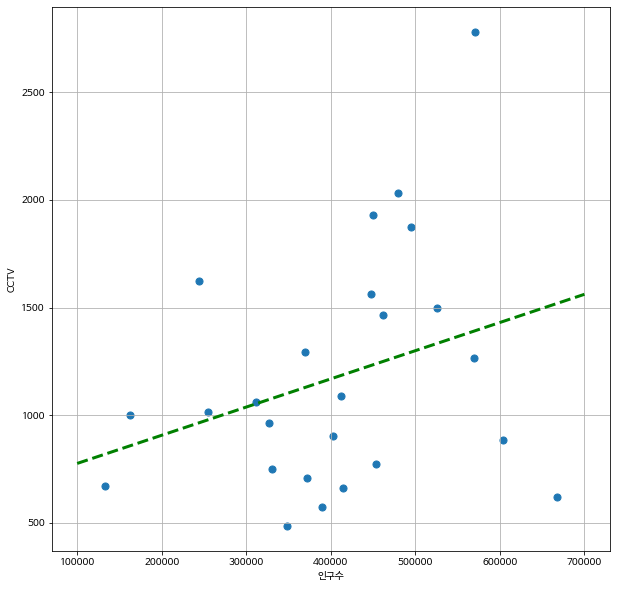

In [36]:
plt.figure(figsize = (10,10))
plt.scatter(DFM['인구수'], DFM['소계'], s = 50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 5) 오차 열 추가 후 시각화

In [37]:
DFM['오차'] = np.abs(DFM['소계'] - f1(DFM['인구수']))

df_sort = DFM.sort_values(by='오차', ascending=False)

DFM

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,1276.101010,0.487292,1388.055355
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,1296.203132,0.170552,465.422892
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,1563.405590,0.226535,329.342026
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,1112.017167,0.146413,551.503155
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,371.788991,0.284673,162.948104
광진구,707,53.228621,372164.0,357211.0,14953.0,42214.0,4.017852,282.311242,0.189970,425.290264
구로구,1561,64.973730,447874.0,416487.0,31387.0,56833.0,7.007998,181.071781,0.348536,329.592918
금천구,1015,100.000000,255082.0,236353.0,18729.0,32970.0,7.342345,176.037162,0.397911,35.989293
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,1883.765384,0.222170,125.483618


**최종 시각화**

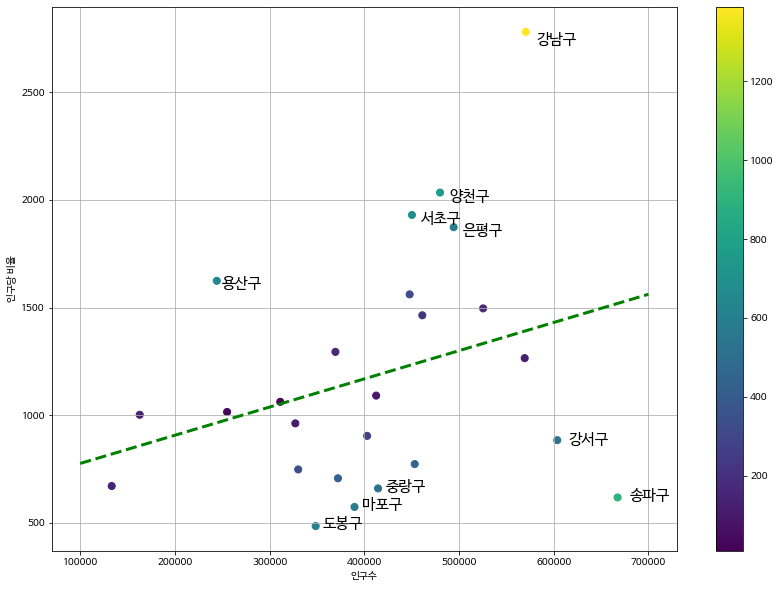

In [41]:
plt.figure(figsize = (14,10))
plt.scatter(DFM['인구수'], DFM['소계'], c=DFM['오차'], s = 50)
plt.plot(fx, f1(fx), ls = 'dashed', lw=3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('인구당 비율')
plt.colorbar()
plt.grid()
plt.show()